# Reading the initial project data into Python

This file will show how to read the data from the files `train.h5` and `test.h5` into Python, for training.
The files are available at:

<https://www.nbi.dk/~petersen/Teaching/ML2023/InitialProject/train.h5>

<https://www.nbi.dk/~petersen/Teaching/ML2023/InitialProject/test.h5>

We start by opening the files and loading them into a Numpy array

In [1]:
import h5py
import pandas as pd
import numpy as np
import sys

from lightning.pytorch.callbacks import EarlyStopping, TQDMProgressBar
from matplotlib import pyplot as plt
from verstack import LGBMTuner
from catboost import CatBoostClassifier, CatBoostRegressor

DATA_DIR = "/home/amh/Documents/Coding/GitHub/AppliedML2023/data/initial"

def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[-1]
        return pd.DataFrame(f[filename][:], dtype=np.float32)

train = load_data(f'{DATA_DIR}/train')
test  = load_data(f'{DATA_DIR}/test')

2023-05-18 21:44:22.624362: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 21:44:23.646502: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-18 21:44:23.646652: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-05-18 21:44:23.646661: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Then we can verify the shape

In [2]:
print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


As expected, the test set contains 2 columns less: `Truth` and `p_truth_E`.
    
Then we copy the variable list from the course website <https://www.nbi.dk/~petersen/Teaching/ML2023/InitialProject/VariableList.html>

In [3]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

Finally, we divide the training data into data (`X`) and labels (`y`)

In [4]:
electrons = train['Truth']
X = train[all_variables][electrons == 1]
y = train["p_truth_E"][electrons == 1]
def reverse_bdt_transform(y_pred):
    return np.exp(y_pred * 2*np.std(np.log(y)) + np.mean(np.log(y)))
y_scaled = pd.Series((y - np.mean(y)) / (2 * np.std(y)))
target = pd.Series((np.log(y) - np.mean(np.log(y))) / (2*np.std(np.log(y))))


print (f'Shape of X: {X.shape}')
print (f'Shape of y: {target.shape}')

Shape of X: (121495, 160)
Shape of y: (121495,)


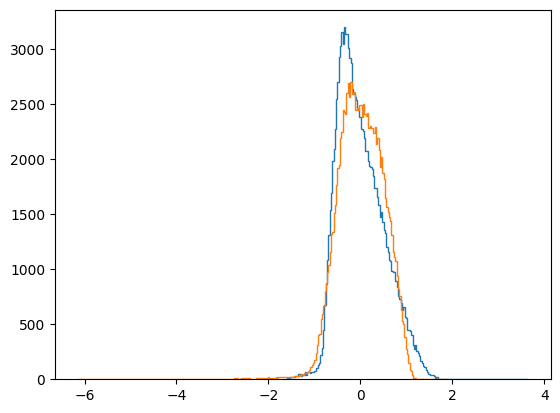

In [5]:
plt.hist(y_scaled, bins="auto", histtype="step")
plt.hist(target, bins="auto", histtype="step")
plt.show()

In [6]:
# lgbm_energy_tuner = LGBMTuner(metric="mse")
# lgbm_energy_tuner.fit(X, target)

In [7]:
# lgbm_energy_tuner.fit(X, y_scaled)

In [8]:
import optuna
from sklearn.model_selection import StratifiedKFold, train_test_split
from catboost import Pool, cv

In [9]:
def objective(trial: optuna.Trial, feature_values: pd.DataFrame = X, target_values: pd.Series = target) -> float:
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Poisson"]),
        "random_strength": trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 10.0),
        "od_type": trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        "od_wait": trial.suggest_int("od_wait", 10, 50),
        "verbose": False,
        "task_type": "GPU",
        "loss_function": "RMSE",
    }
    X_train, X_val, y_train, y_val = train_test_split(feature_values, target_values, test_size=0.2, random_state=42)
    cat_reg = CatBoostRegressor(**params)
    cat_reg.fit(X_train, y_train)
    return np.sum(np.abs((cat_reg.predict(X_val) - y_val) / y_val))


In [ ]:
study = optuna.create_study()
optuna.logging.set_verbosity(optuna.logging.INFO)
study.optimize(objective, n_trials=100)

[I 2023-05-18 21:44:25,985] A new study created in memory with name: no-name-68775db1-7108-4ae4-bb19-baa2d358c791
[I 2023-05-18 21:44:30,579] Trial 0 finished with value: 23225.406030836835 and parameters: {'iterations': 994, 'learning_rate': 0.0062105312767894655, 'depth': 4, 'l2_leaf_reg': 4.1007446185927305e-05, 'bootstrap_type': 'Bayesian', 'random_strength': 0.00010794383722683149, 'bagging_temperature': 4.828896774437545, 'od_type': 'IncToDec', 'od_wait': 23}. Best is trial 0 with value: 23225.406030836835.
[I 2023-05-18 21:44:32,941] Trial 1 finished with value: 21286.285315306515 and parameters: {'iterations': 368, 'learning_rate': 0.0071412807056183145, 'depth': 6, 'l2_leaf_reg': 3.6955161539358016e-05, 'bootstrap_type': 'Poisson', 'random_strength': 0.0004474518206421237, 'bagging_temperature': 8.614900832320286, 'od_type': 'IncToDec', 'od_wait': 30}. Best is trial 1 with value: 21286.285315306515.
[I 2023-05-18 21:44:41,295] Trial 2 finished with value: 20927.17814665471 and

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, target, test_size=0.2, random_state=42)
cat_reg = CatBoostRegressor(**study.best_params, task_type="GPU", verbose=0)
cat_reg.fit(X_train, y_train)

feature_importance = cat_reg.get_feature_importance(Pool(X_val.to_numpy(), label=y_val.to_numpy()))

In [ ]:
top_features = sorted([(feature_score, feature) for feature, feature_score in zip(X_val.columns, feature_importance)])[::-1]
print(top_features)
print([t[1] for t in top_features[:20]])


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(cat_reg)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val)

In [ ]:
from dataset import EnergyDataset
from model import LightningFullyConnected
from train import single_run
from torch import nn
import torch
import lightning as L
from torch.nn import functional as F

def rel_mae(y_pred, y_true):
    return torch.sum(torch.abs((y_pred - y_true) / y_true)) / len(y_pred)

In [ ]:
batch_size = 2500
max_epochs = 1000
patience = 10
refresh_rate = 10

model = LightningFullyConnected(
    in_channels=160, out_channels=1, hidden_channels=400, decode_channels=20, hidden_layers=5,
    p_dropout=0.2, activation=nn.LeakyReLU, final_activation=None, lr=0.0003, batch_size=batch_size, optimizer=torch.optim.AdamW,
    scheduler=torch.optim.lr_scheduler.CosineAnnealingLR, loss_fn=F.mse_loss
)
train_data, val_data = EnergyDataset().split_data(0.8)
num_workers = 8
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=8)
val_dataloader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=8)

trainer = L.Trainer(devices=1, accelerator="gpu",
                    max_epochs=max_epochs,
                    callbacks=[EarlyStopping(monitor="val_loss", mode="min", patience=patience),],
                    )
trainer.fit(model, train_dataloader, val_dataloader)

In [ ]:
print(rel_mae(model(val_data[:][0]), val_data[:][1]))
print(torch.mean((model(val_data[:][0]) - val_data[:][1])**2))
print(np.mean(((cat_reg.predict(X_val) - y_val)**2)))

In [ ]:
fig, axs = plt.subplots(ncols=2, sharey=True)
axs[0].scatter(val_data.reverse_transform(nn_pred := model(val_data[:][0]).detach().numpy()),
               val_data.reverse_transform(nn_val := val_data[:][1].detach().numpy()),
                                               label="nn", color="b")
axs[1].scatter(reverse_bdt_transform(cat_reg.predict(X_val)),
               reverse_bdt_transform(y_val),
               label="cat", color="r")
axs[0].legend()
axs[1].legend()
plt.show()